In [115]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
image = ski.io.imread("sea_wall.jpg")
#image = ski.io.imread("monkey.jpg")
#image = ski.io.imread("bild02.jpg")
car_imge = ski.io.imread("bild01.jpg")

**Lesen Sie ein Bild mit Hilfe von scikit-image ein und lassen Sie sich das Bild anzeigen**

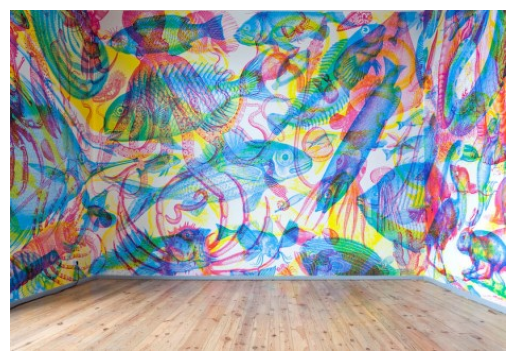

In [116]:
plt.imshow(image)
plt.axis('off')
plt.show()

**Untersuchen Sie den Datentyp des eingelesenen Bildes. Wie ist ein Numpy Array aufgebaut?**

In [117]:
print(f"Datentyp: {image.dtype}")
print(f"Shape: {image.shape}")

Datentyp: uint8
Shape: (322, 468, 3)


**Lassen Sie sich die drei Farbkanäle eines Bildes getrennt anzeigen.**

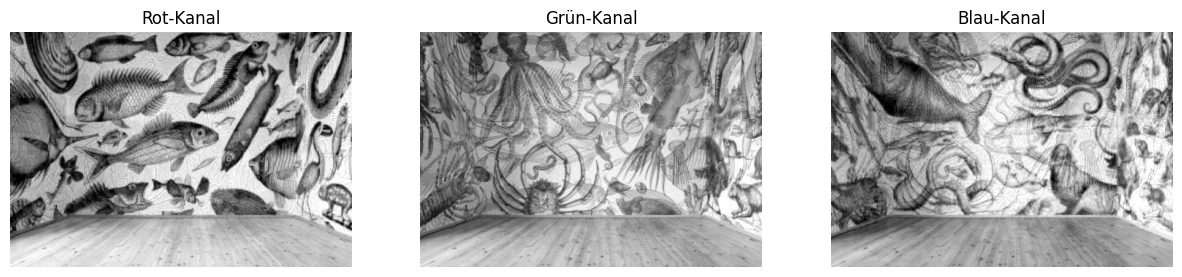

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['Rot', 'Grün', 'Blau']
for i in range(3):
    channel = np.zeros_like(image)
    channel = image[:, :, i]
    axes[i].imshow(channel, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"{colors[i]}-Kanal")
plt.show()

**Implementieren Sie eine Funktion, die ein eingelesenes Bild wahlweise horizontal oder
vertikal spiegelt. (Verwenden Sie hierfür keine Numpy Funktionen.)**

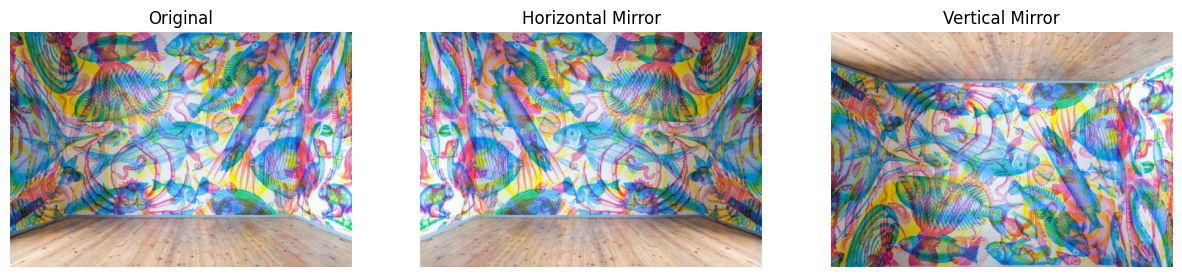

In [119]:
height, width, channels = image.shape
mirrored_vertical = np.zeros_like(image)
mirrored_horizontal = np.zeros_like(image)
for y in range(height):
    for x in range(width):
        mirrored_vertical[y, x] = image[y, width - x - 1]
for y in range(height):
    for x in range(width):
        mirrored_horizontal[y, x] = image[height - y - 1, x]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[1].imshow(mirrored_vertical)
axes[2].imshow(mirrored_horizontal)
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].set_title("Original")
axes[2].set_title("Vertical Mirror")
axes[1].set_title("Horizontal Mirror")
plt.show()

**Schreiben Sie einen Funktion, die das Histogramm eines 8-Bit-Graustufenbildes (256
Intensitätsstufen) berechnet.**

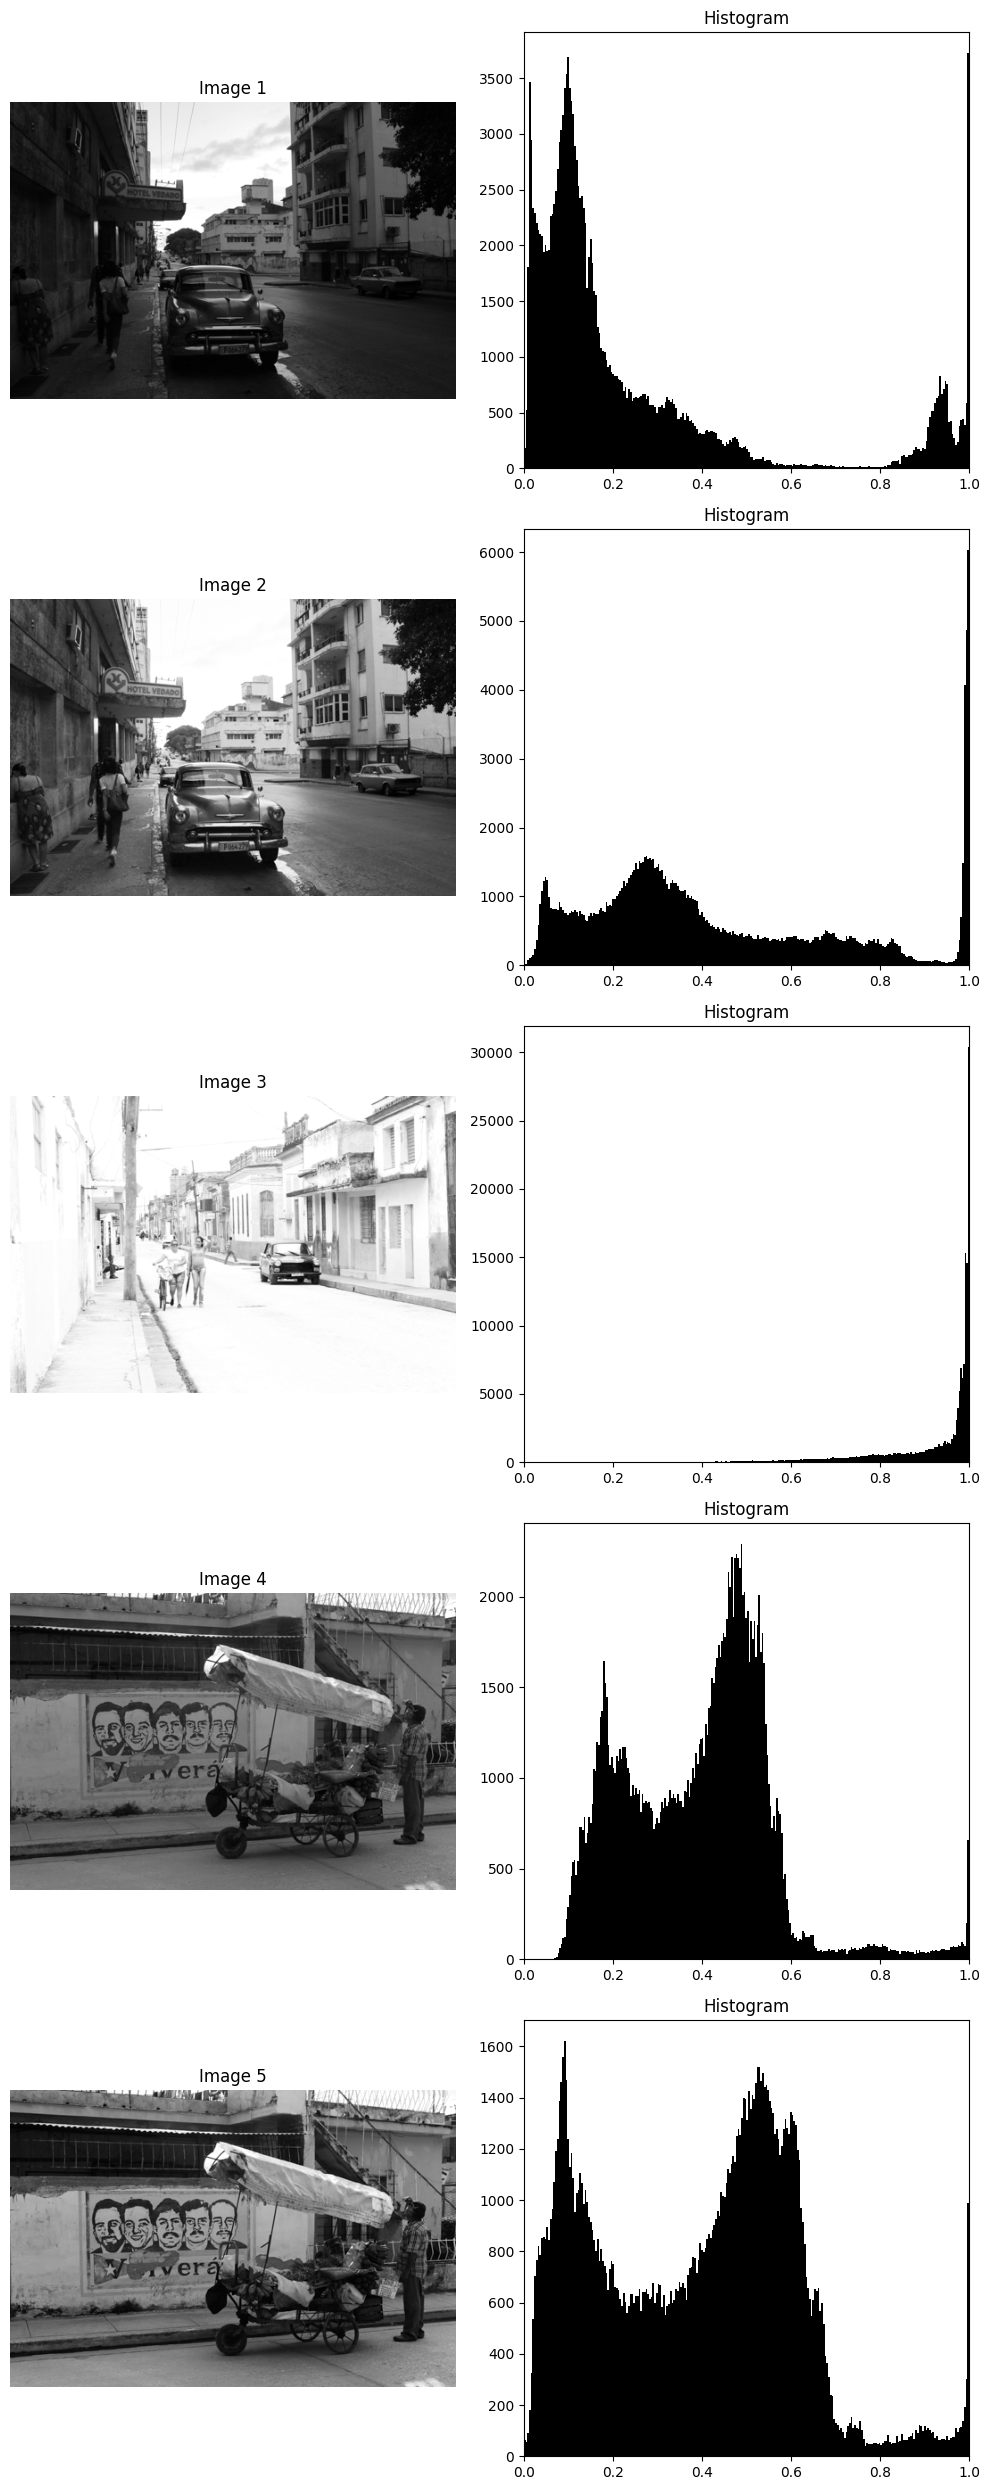

In [120]:
def plot_images_and_histograms(image_paths):
    fig, axes = plt.subplots(len(image_paths), 2, figsize=(10, 5 * len(image_paths)))

    for i, image_path in enumerate(image_paths):
        image = ski.io.imread(image_path)
        gray_image = ski.color.rgb2gray(image)
        axes[i, 0].imshow(gray_image, cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f"Image {i+1}")
        axes[i, 1].hist(gray_image.ravel(), bins=256, color='black')
        axes[i, 1].set_xlim([0, 1])
        axes[i, 1].set_title("Histogram")

    plt.tight_layout()
    plt.show()

# Example usage
image_paths = ["bild01.jpg", "bild02.jpg", "bild03.jpg", "bild04.jpg", "bild05.jpg"]
plot_images_and_histograms(image_paths)


Bild1: Unterbelichtet, am histogramm an den vielen pixeln nahe 0 zu erkennen  
Bild3: Überbelichtet, am histogramm an den vielen pixeln nahe 255 zu erkennen  
  
Bild 2 hat im vergliech mit Bild 1 einen höheren peak in den Maximalwerten und wurde abgeschwächt in den Dunkelwerten, was die allgemeine Helliggeit erhöht. Bereits helle Stellen werden weiter aufgehellt und daher gehen Daten verloren.  
  

**Implementieren Sie eine Funktion, die eine Punktoperation mithilfe einer Lookup-Tabelle zum Aufhellen eines Bildes durchführt.**  
  
a) In Aufgabe (4b) gingen Daten beim Aufhellen eines Bildes verloren. Wie könnte dies vermieden werden?  
b) Damit beim Aufhellen von Bild01 keine Daten verloren gehen, soll eine Lookup-Tabelle verwendet werden. Versuchen Sie mit der Lookup-Tabelle die dunklen  
Bildbereiche des Bildes aufzuhellen ohne die hellen Bereiche zu stark zu verändern.  

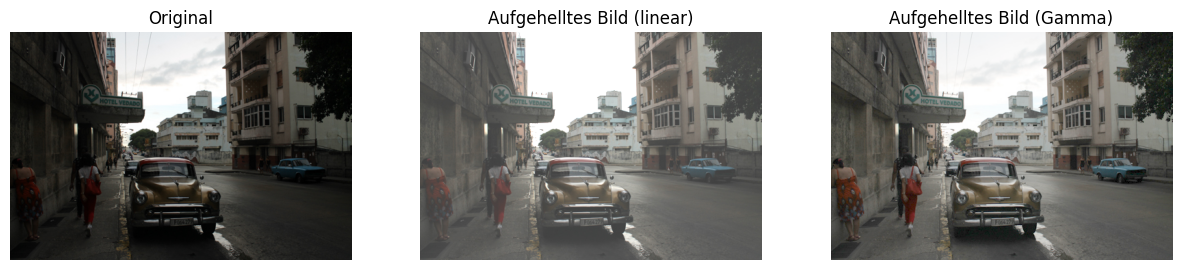

In [121]:
gamma = 0.5
offset = 65
lut_lin = np.clip(np.arange(256) + offset, 0, 255).astype(np.uint8)

lut_S = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype(np.uint8)
brightened_S = lut_S[car_imge]
brightened_lin = lut_lin[car_imge]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(car_imge)
axes[0].axis('off')
axes[0].set_title("Original")
axes[1].imshow(brightened_lin)
axes[1].axis('off')
axes[1].set_title("Aufgehelltes Bild (linear)")
axes[2].imshow(brightened_S)
axes[2].axis('off')
axes[2].set_title("Aufgehelltes Bild (Gamma)")
plt.show()


 

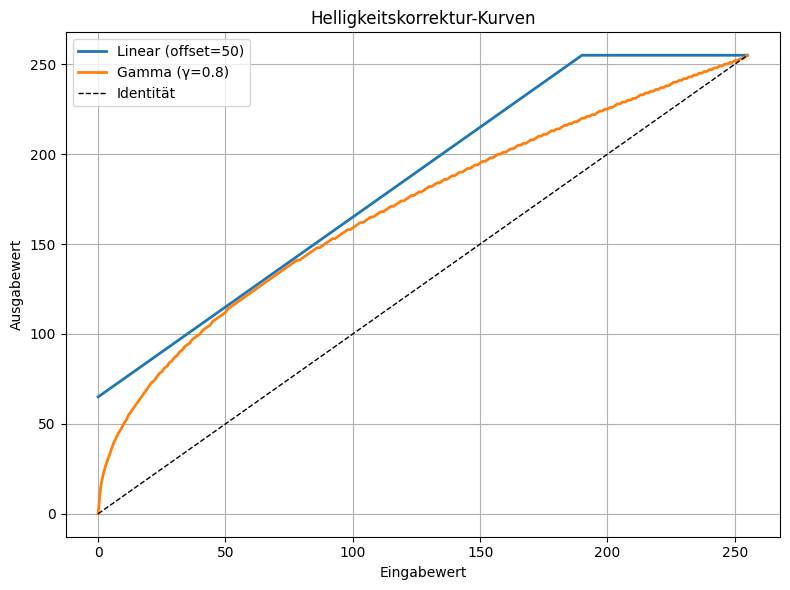

In [122]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(256), lut_lin, label='Linear (offset=50)', linewidth=2)
plt.plot(np.arange(256), lut_S, label='Gamma (γ=0.8)', linewidth=2)
plt.plot(np.arange(256), np.arange(256), 'k--', label='Identität', linewidth=1)

plt.title("Helligkeitskorrektur-Kurven")
plt.xlabel("Eingabewert")
plt.ylabel("Ausgabewert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
